# Uniform Linear Array (ULA) in Line-of-sight (LoS) channel

[Video lecture.](https://www.youtube.com/watch?v=9cJrZRRu6LM&list=PLTv48TzNRhaKb_D7SF3d1eNoqjrTJg34C&index=2&t=23m07s)

Let consider a SIMO system with one transmit antenna, and multiple receive
antennas with Uniform Linear Array shape. The receive antennas are all
located on a line and have the same spacing between antennas $\Delta$, and
the angle of arrival of the signal is $\varphi$ regarding the first
antenna as the reference antenna. If $\varphi=0$, it's called broadside
direction, f $\varphi=\pm\pi/2$, it's called the end-fire direction.

Assume the transmitter is located at the location in the far-field of
the ULA, then distances $d_1, d_2, \dots,d_M$ are approximately the same.

So with M antennas in receive array, angle of arrival $\varphi$, Wavelength
$\lambda$, antenna spacing $\Delta$, distance $d$ to the first antenna,
the channel vector is defined as:
$\mathbf{g}=\frac{\lambda}{4\pi d}\left[
\begin{matrix} 1 \\ e^{-j2\pi\frac{\Delta \sin(\varphi)}{\lambda}}
\\  \vdots \\ e^{-j2\pi\frac{(M-1)\Delta \sin(\varphi)}{\lambda}}
\end{matrix}
\right]$

![Alt text](images/06_uniform_linear_array.png?raw=true "Title")

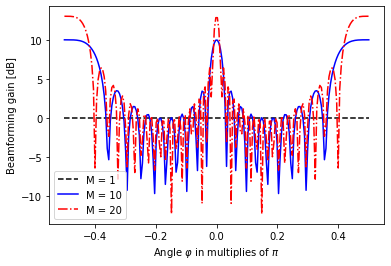

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, exp, abs, transpose, log10


m_values = [1, 10, 20]
var_phi = np.linspace(-0.5, 0.5, 200)*pi
antenna_spacing = 1/2
g_function = np.zeros((len(m_values),len(var_phi)))

for m in range(len(m_values)):
    for n in range(len(var_phi)):
        h = exp(-1j*2*pi*antenna_spacing*sin(var_phi[n])
                *(np.arange(m_values[m]).reshape(m_values[m],1)))
        g_function[m,n] = 10*log10(abs(np.dot(transpose(h),h)))


plt.plot(var_phi/pi,g_function[0,:],'k--',
         var_phi/pi,g_function[1,:],'b',
         var_phi/pi,g_function[2,:],'r-.')
plt.xlabel(r'Angle $\varphi$ in multiplies of $\pi$')
plt.ylabel('Beamforming gain [dB]')
plt.legend(['M = 1', 'M = 10', 'M = 20'])

## Summary
With more antenna, the main beam will be narrower and provide better
performance. The figure compares between $M = \{1,10,20\}$ antennas.
With M = 20, the maximum beamforming gain is going up by 3 dB and
the main beam is narrower, only half of the beam width in the case
M = 10. So, there are two main benefits of beamforming:
- the strong signal at the desired location and slightly around it
- narrower beam which means that there is less interference at
undesired locations

Next: [Multipath propagation and Rayleigh fading, slow & fast fading](07_fading.ipynb)

